# CMPUT 466 Final Project
Arun Woosaree

I will be doing binary classification with 3 different algorithms on the microsoft cats vs dog dataset

Download the data
https://www.microsoft.com/en-us/download/details.aspx?id=54765

In [9]:
#![ ! -d PetImages ] && unzip kagglecatsanddogs_3367a.zip
!pipenv install
!kaggle competitions download -c dogs-vs-cats
![ ! -d input ] && unzip dogs-vs-cats.zip -d input

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing dependencies from Pipfile.lock (8d58bf)...

To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  dogs-vs-cats.zip
  inflating: input/sampleSubmission.csv  
  inflating: input/test1.zip         
  inflating: input/train.zip         


In [27]:
# code for extracting data from here
# https://www.kaggle.com/shaft49/cats-vs-dogs
import shutil
import os
from PIL import Image
import zipfile
def make_directory(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
    os.makedirs(dir_path)


DATASET_PATH = 'data'

make_directory(DATASET_PATH)

# extract train data
with zipfile.ZipFile('input/train.zip', 'r') as zip_ref:
    zip_ref.extractall(DATASET_PATH)

# extract test data
with zipfile.ZipFile('input/test1.zip', 'r') as zip_ref:
    zip_ref.extractall(DATASET_PATH)

TRAIN_DATA_PATH = os.path.sep.join([DATASET_PATH, 'train'])
TEST_DATA_PATH = os.path.sep.join([DATASET_PATH, 'test1'])
train_files = os.listdir(TRAIN_DATA_PATH)
test_files = os.listdir(TEST_DATA_PATH)

print(f"#train: {len(train_files)} #test: {len(test_files)}")
print(TRAIN_DATA_PATH, TEST_DATA_PATH)

#train: 25000 #test: 12500
data/train data/test1


Make sure the images are there

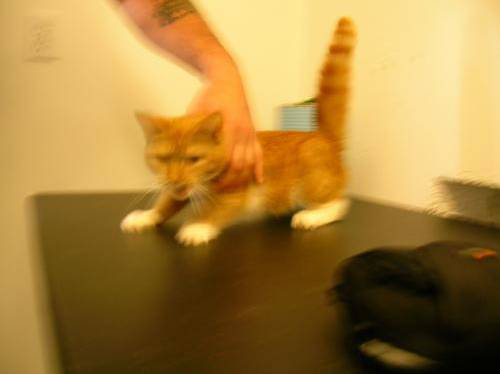

In [18]:
Image.open(os.path.sep.join([TRAIN_DATA_PATH, train_files[0]])) 

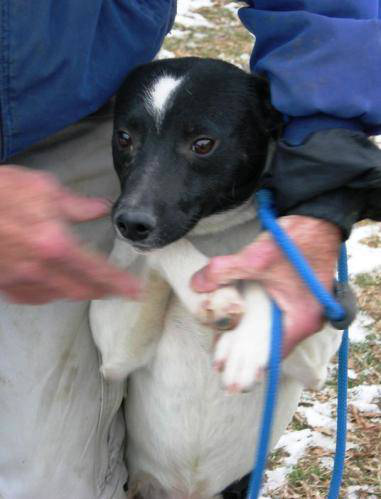

In [19]:
Image.open(os.path.sep.join([TEST_DATA_PATH, test_files[0]])) 

In [28]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [29]:
# https://discuss.pytorch.org/t/whats-the-range-of-the-input-value-desired-to-use-pretrained-resnet152-and-vgg19/1683/2
# https://github.com/pytorch/examples/blob/42e5b996718797e45c46a25c55b031e6768f8440/imagenet/main.py#L89-L103

train_transform = transforms.Compose(
    [
        transforms.RandomRotation(5),
        transforms.RandomHorizontalFlip(),
        transforms.RandomResizedCrop(224, scale=(0.96, 1.0), ratio=(0.95, 1.05)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)
test_transform = transforms.Compose(
    [
        transforms.Resize([224, 224]),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

In [ ]:
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
class CatvsDogDataset(Dataset):
    def __init__(self, file_list, img_dir, mode='train', transform=None) -> None:
        self.file_list = file_list
        self.img_dir = img_dir
        self.mode = mode
        self.transform = transform
        if self.mode == 'train':
            if 'dog' in self.file_list[0]:
                self.label = 1
            elif 'cat' in self.file_list[0]:
                self.label = 0
            else:
                raise Exception("Invalid class must be dog or cat")
    def __len__(self):
        return len(self.file_list)
    def __getitem__(self, index):
        image = Image.open(os.path.join(self.img_dir, self.file_list[index]))
        if self.transform is not None:
            image = self.transform(image)
        if self.mode == 'train':
            image = image.numpy()
            return image.astype('float32'), self.label
        # mode is test
        image = image.numpy()
        return image.astype('float32'), self.file_list[index]